## Project 2.0 using Keras [Neural Network]

In [32]:
from sklearn.cluster import KMeans
import numpy as np
import csv
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

## Processing Input and Label Data

In [33]:
def processData(dataset):
    
    Feature = pd.read_csv('HOFD.csv', index_col=False)
    allFeature = Feature.drop(Feature.columns[0], axis = 1, inplace=True)
    Samepair = pd.read_csv('same_pairs.csv')
    Diffpair = pd.read_csv('diffn_pairs.csv')
    Diffpair_new = Diffpair.sample(791)
    listy = [Samepair, Diffpair_new]
    mixed = pd.concat(listy)
    mixed_shuffled = shuffle(mixed) 
    t = mixed_shuffled['target']
    t = t.as_matrix()   
    mixed_shuffled = mixed_shuffled.drop(['target'], axis = 1)
    data1 = pd.merge(left=mixed_shuffled, right=Feature, left_on='img_id_A', right_on='img_id')
    data1 = data1.loc[:, ~data1.columns.str.contains('^img_id')]
    data2 = pd.merge(left=mixed_shuffled, right=Feature, left_on='img_id_B', right_on='img_id')
    data2 = data2.loc[:, ~data2.columns.str.contains('^img_id')]
    data3 = data1.sub(data2)

    processedLabel = np.array(t)
    processedData = np.array(data3)
    
    return processedData, processedLabel

In [34]:
from keras.utils import np_utils

def encodeLabel(labels):
    return np_utils.to_categorical(np.array(processedLabel),2)

## Create Testing Datasets

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 9
drop_out = 0.2
first_dense_layer_nodes  = 512
second_dense_layer_nodes  = 128
third_dense_layer_nodes  = 2

def get_model():
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(third_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.summary()

    model.compile(optimizer='adamax',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Model</font>

In [36]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               5120      
_________________________________________________________________
activation_16 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
activation_17 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 258       
__________

# <font color = blue>Run Model</font>

In [37]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('HOFD.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
processedLabel = encodeLabel(processedLabel)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

C:\Users\sagni\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


Train on 1265 samples, validate on 317 samples
Epoch 1/10000
1265/1265 [==============================] - 0s 342us/step - loss: 0.6931 - acc: 0.5217 - val_loss: 0.6968 - val_acc: 0.4101
Epoch 2/10000
1265/1265 [==============================] - 0s 48us/step - loss: 0.6918 - acc: 0.5225 - val_loss: 0.6994 - val_acc: 0.4101
Epoch 3/10000
1265/1265 [==============================] - 0s 54us/step - loss: 0.6916 - acc: 0.5225 - val_loss: 0.7017 - val_acc: 0.4101
Epoch 4/10000
1265/1265 [==============================] - 0s 58us/step - loss: 0.6909 - acc: 0.5225 - val_loss: 0.7032 - val_acc: 0.4101
Epoch 5/10000
1265/1265 [==============================] - 0s 55us/step - loss: 0.6903 - acc: 0.5225 - val_loss: 0.7031 - val_acc: 0.4101
Epoch 6/10000
1265/1265 [==============================] - 0s 91us/step - loss: 0.6898 - acc: 0.5257 - val_loss: 0.7033 - val_acc: 0.4132
Epoch 7/10000
1265/1265 [==============================] - 0s 54us/step - loss: 0.6890 - acc: 0.5383 - val_loss: 0.7036 - va

1265/1265 [==============================] - 0s 55us/step - loss: 0.6416 - acc: 0.6253 - val_loss: 0.7234 - val_acc: 0.4763
Epoch 60/10000
1265/1265 [==============================] - 0s 58us/step - loss: 0.6438 - acc: 0.6198 - val_loss: 0.7249 - val_acc: 0.4795
Epoch 61/10000
1265/1265 [==============================] - 0s 45us/step - loss: 0.6427 - acc: 0.6348 - val_loss: 0.7254 - val_acc: 0.4858
Epoch 62/10000
1265/1265 [==============================] - 0s 52us/step - loss: 0.6384 - acc: 0.6372 - val_loss: 0.7269 - val_acc: 0.4826
Epoch 63/10000
1265/1265 [==============================] - 0s 54us/step - loss: 0.6410 - acc: 0.6316 - val_loss: 0.7286 - val_acc: 0.4826
Epoch 64/10000
1265/1265 [==============================] - 0s 54us/step - loss: 0.6427 - acc: 0.6308 - val_loss: 0.7289 - val_acc: 0.4858
Epoch 65/10000
1265/1265 [==============================] - 0s 53us/step - loss: 0.6386 - acc: 0.6277 - val_loss: 0.7278 - val_acc: 0.4858
Epoch 66/10000
1265/1265 [================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001829DA1CD68>,
      dtype=object)

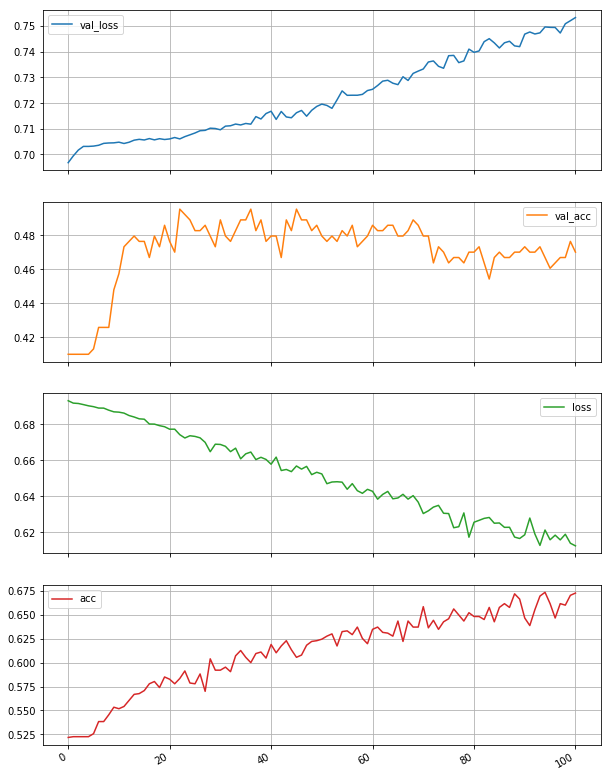

In [38]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))